In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms

from Dataloader import prepare_data_loader
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt

In [2]:
training_data_dir = './data/lunar/training/data/S12_GradeA/'
training_labels_file = './data/lunar/training/catalogs/apollo12_catalog_GradeA_final.csv'

train_loader = prepare_data_loader(overlap=0.25, window_length=1, decimation_factor=3, spect_nfft=128, spect_nperseg=128, batch_size=128, data_dir = training_data_dir, labels_file_path=training_labels_file)

Starting number of files: 76
Number of uniques files: 71
(6633, 65, 70)
(6633,)
Number of windows with seismic events: 299


In [3]:
all_x, all_labels = [], []
for img, _, ev_type in train_loader:
    all_x.append(img.detach().cpu())
    all_labels.append(ev_type)
all_x = torch.cat(all_x).cpu().numpy()
all_labels = torch.cat(all_labels).cpu().numpy()
print(all_x.shape, all_labels.shape)

(6633, 65, 70) (6633,)


In [4]:
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(all_x.reshape(all_x.shape[0], -1))

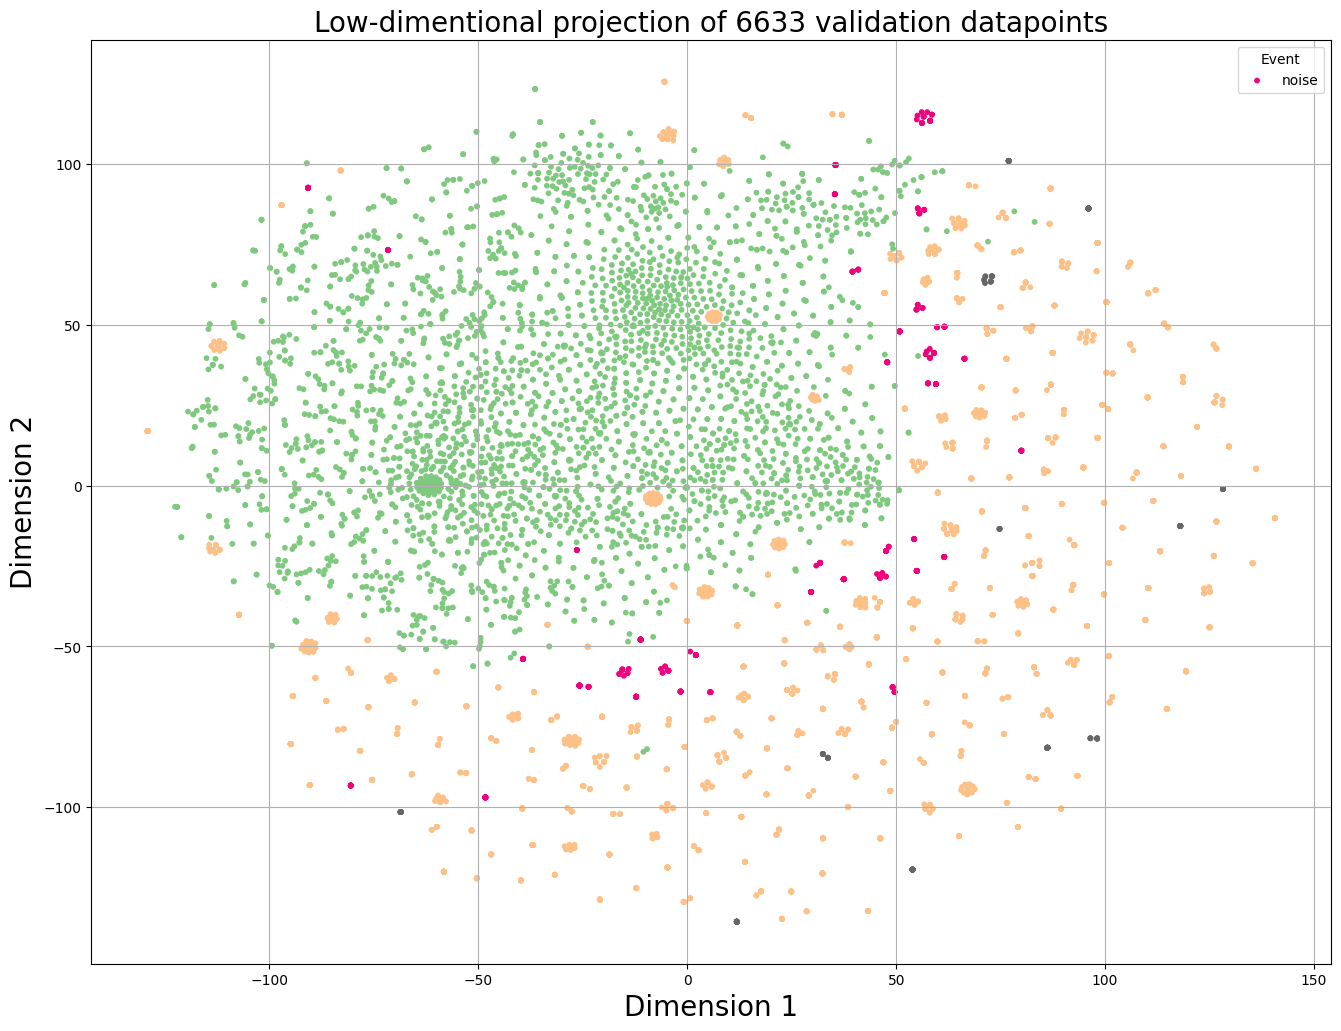

In [6]:
plt.figure(figsize=(16, 12))

# scatter = plt.scatter(all_encodings[:, 0], all_encodings[:, 1], c=all_labels.astype(int), cmap='tab10', s=10)
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=all_labels.astype(int), cmap='Accent', s=10)

# Display legend
plt.grid(True)
# plt.xlim(-1, -0.25)
# plt.ylim(-1, -0.7)
plt.title(f'Low-dimentional projection of {X_tsne.shape[0]} validation datapoints', fontsize=20)
plt.xlabel('Dimension 1', fontsize=20)
plt.ylabel('Dimension 2', fontsize=20)
# plt.colorbar(scatter)
#legend
# plt.legend(*scatter.legend_elements(), title="Event")
plt.legend(['noise', 'impact mq', 'deep mq', 'shallow mq'], title="Event")
plt.show()